Aqui está a lista de demandas.

Exclua as colunas: "cogs", "gross margin percentage", "gross income".ok

Utilize Regex para identificar IDs com terminações entre '47' e '57' e
substitua esses dois últimos valores por '00'.ok

Qual é a média mensal de vendas?ok

Qual é a linha de produtos mais bem avaliada? Gere um gráfico de Pizza.ok

Quais são os 5 produtos mais caros de acordo com a linha de produtos?ok

Quais são os 10 produtos mais populares (vendidos com maior frequência)? E os
10 menos populares?ok

Existe alguma correlação entre o preço de um produto e a quantidade vendida?ok

Existe alguma correlação entre o preço de um produto e o método de pagamento?ok

Gere um gráfico de Dispersão.ok

Qual é o perfil de cliente que mais compra? Leve em conta cidade, tipo de cliente e gênero.ok

Quais são os meses de pico de vendas? E os meses mais fracos? Gere um gráfico de sua escolha para exemplificar essas diferenças.ok

Qual filial gera mais receita?ok

Há uma diferença no padrão de vendas durante os dias da semana e os fins de semana?

**importando bibliotecas necessárias**

In [1]:
import pandas as pd

**importando csv do Kaggle**

In [2]:
!kaggle datasets download -d aungpyaeap/supermarket-sales

Dataset URL: https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales

License(s): other


  0% 0.00/35.9k [00:00<?, ?B/s]

100% 35.9k/35.9k [00:00<00:00, 13.7MB/s]


In [3]:
!unzip supermarket-sales.zip

Archive:  supermarket-sales.zip

  inflating: supermarket_sales - Sheet1.csv  


**utilizando pandas para leitura do arquivo**

In [4]:
dataf = pd.read_csv('/content/supermarket_sales - Sheet1.csv')
dataf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


**verificando a existencia de dados nulos**

In [5]:
dataf.isnull().sum()

,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


**verificando tipos das colunas**

In [6]:
dataf.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 1000 entries, 0 to 999

Data columns (total 17 columns):

 #   Column                   Non-Null Count  Dtype  

---  ------                   --------------  -----  

 0   Invoice ID               1000 non-null   object 

 1   Branch                   1000 non-null   object 

 2   City                     1000 non-null   object 

 3   Customer type            1000 non-null   object 

 4   Gender                   1000 non-null   object 

 5   Product line             1000 non-null   object 

 6   Unit price               1000 non-null   float64

 7   Quantity                 1000 non-null   int64  

 8   Tax 5%                   1000 non-null   float64

 9   Total                    1000 non-null   float64

 10  Date                     1000 non-null   object 

 11  Time                     1000 non-null   object 

 12  Payment                  1000 non-null   object 

 13  cogs                     1000 non-null   float64

 14  gross 

**Excluindo as colunas: "cogs", "gross margin percentage", "gross income".**

In [7]:
colunas_a_remover = ["cogs", "gross margin percentage", "gross income"]
dataf.drop(colunas_a_remover, axis = 1, inplace = True)
dataf.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,5.3


**Removendo ID's que com terminação de 47 a 57 e substituindo por 00 utilizando REGEX**

In [8]:
#Regex para identificar números que terminam em 47 a 57
dataf['Invoice ID'] = dataf['Invoice ID'].str.replace(r'47$|48$|49$|50$|51$|52$|53$|54$|55$|56$|57$', '00', regex = True)
#dataf['Invoice ID'].unique()
regex = r'47$|48$|49$|50$|51$|52$|53$|54$|55$|56$|57$'

#renomeando a coluna devido ao nome espaçado
dataf.rename(columns={'Invoice ID': 'Invoice_ID'}, inplace=True)

#verificando se a substituição deu certo
dataf.query('Invoice_ID.str.contains(@regex)', engine='python')

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating


**Verificando Média mensal de vendas**

In [9]:
#transformando coluna Date em tipo datetime
dataf['Date'] = pd.to_datetime(dataf['Date'])

#criando coluna mes
dataf['Month'] = dataf['Date'].dt.month

#agrupando coluna total e meses
average_monthly_sales = dataf.groupby('Month')['Total'].sum().mean()
print(f'a media mensal de produtos vendidos é de:',average_monthly_sales)

a media mensal de produtos vendidos é de: 107655.583


In [10]:
#removendo coluna mes
dataf.drop('Month', axis = True, inplace = True)
dataf.head()

,Invoice_ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,5.3


**linha de produto mais bem avaliada**

In [11]:
best_products = dataf.groupby('Product line')['Rating'].mean()
best_products.sort_values(ascending = False)


,Rating
Product line,
Food and beverages,7.113218
Fashion accessories,7.029213
Health and beauty,7.003289
Electronic accessories,6.924706
Sports and travel,6.916265
Home and lifestyle,6.837500


A Linha de produto mais bem avaliada é "Food and beverages", pois a média de avaliação é a maior

<Axes: ylabel='Rating'>

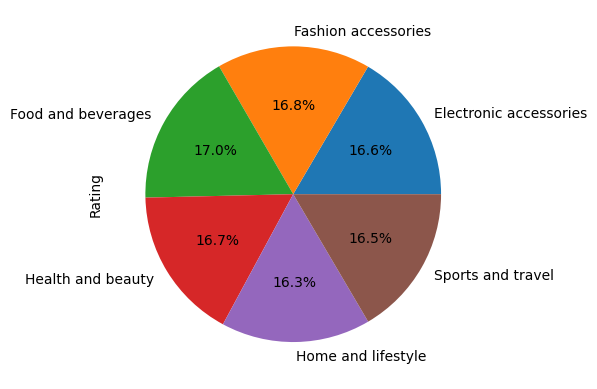

In [12]:
best_products.plot(kind = 'pie', autopct='%1.1f%%')

**Verificando 5 produtos mais caros de acordo com a linha de produtos(nao consegui)**

In [13]:
#verifica-se que varios valores estão com 0 faltando
dataf['Unit price'].unique()

array([74.69, 15.28, 46.33, 58.22, 86.31, 85.39, 68.84, 73.56, 36.26,
       54.84, 14.48, 25.51, 46.95, 43.19, 71.38, 93.72, 68.93, 72.61,
       54.67, 40.3 , 86.04, 87.98, 33.2 , 34.56, 88.63, 52.59, 33.52,
       87.67, 88.36, 24.89, 94.13, 78.07, 83.78, 96.58, 99.42, 68.12,
       62.62, 60.88, 54.92, 30.12, 86.72, 56.11, 69.12, 98.7 , 15.37,
       93.96, 56.69, 20.01, 18.93, 82.63, 91.4 , 44.59, 17.87, 15.43,
       16.16, 85.98, 44.34, 89.6 , 72.35, 30.61, 24.74, 55.73, 55.07,
       15.81, 75.74, 15.87, 33.47, 97.61, 78.77, 18.33, 89.48, 62.12,
       48.52, 75.91, 74.67, 41.65, 49.04, 78.31, 20.38, 99.19, 96.68,
       19.25, 80.36, 48.91, 83.06, 76.52, 49.38, 42.47, 76.99, 47.38,
       44.86, 21.98, 64.36, 89.75, 97.16, 87.87, 12.45, 52.75, 82.7 ,
       48.71, 78.55, 23.07, 58.26, 30.35, 88.67, 27.38, 62.13, 33.98,
       81.97, 16.49, 98.21, 72.84, 58.07, 80.79, 27.02, 21.94, 51.36,
       10.96, 53.44, 99.56, 57.12, 99.96, 63.91, 56.47, 93.69, 32.25,
       31.73, 68.54,

In [14]:
dataf.groupby('Product line').groups

{'Electronic accessories': [1, 5, 6, 11, 12, 20, 23, 37, 45, 48, 55, 59, 73, 75, 95, 97, 102, 105, 109, 120, 133, 136, 156, 172, 173, 194, 201, 202, 206, 209, 210, 217, 220, 222, 227, 228, 231, 238, 246, 248, 256, 258, 259, 260, 290, 291, 292, 295, 296, 303, 304, 305, 308, 314, 317, 329, 335, 338, 340, 346, 348, 351, 354, 358, 366, 369, 370, 379, 381, 392, 399, 419, 421, 432, 439, 450, 451, 454, 457, 458, 469, 474, 477, 479, 481, 496, 505, 513, 520, 532, 543, 549, 553, 554, 560, 562, 563, 600, 610, 617, ...], 'Fashion accessories': [10, 26, 27, 30, 49, 52, 53, 67, 71, 76, 77, 86, 100, 101, 106, 112, 115, 116, 117, 124, 127, 130, 135, 146, 150, 152, 167, 177, 180, 191, 195, 208, 218, 223, 230, 233, 237, 239, 242, 247, 251, 255, 261, 262, 275, 277, 278, 300, 309, 311, 323, 332, 336, 345, 350, 352, 356, 365, 371, 373, 375, 378, 388, 390, 391, 403, 404, 407, 409, 422, 423, 424, 425, 430, 433, 434, 443, 447, 455, 472, 486, 487, 490, 491, 494, 501, 512, 515, 526, 527, 531, 536, 538, 546, 550

**como o df não tem uma coluna 'Produto', usei os preços unitarios para mostrar os 5 maiores preços por departamento**

In [15]:
#como o metodo nlargest, n pode ser usado direto no groupby, criei por meio do metodo apply, uma função lambda que aplica o nlargest utilizando 5(numero desejado) e o nome da coluna desejada
top5_expensive = top_5_expensive_products = dataf.groupby('Product line').apply(lambda x: x.nlargest(5, 'Unit price')).reset_index(drop=True)

#separando as duas colunas desejadas do resto do df
top5_expensive = top5_expensive[['Product line', 'Unit price']]
top5_expensive


,Product line,Unit price
0,Electronic accessories,99.73
1,Electronic accessories,99.69
2,Electronic accessories,99.56
3,Electronic accessories,99.55
4,Electronic accessories,98.84
5,Fashion accessories,99.89
6,Fashion accessories,99.82
7,Fashion accessories,99.82
8,Fashion accessories,99.30
9,Fashion accessories,99.25


**Quais são os 10 produtos mais populares (vendidos com maior frequência)? E os 10 menos populares?**

**Esses são os preços dos 10 produtos mais vendidos**

In [16]:
#agrupando colunas preço e quantidade, para identificar os produtos mais populares, depois as colocando em ordem decrescente
ten_more = dataf.groupby('Unit price')['Quantity'].sum().sort_values(ascending = False).head(10)
ten_more

,Quantity
Unit price,
87.87,19
20.01,18
99.96,16
98.70,16
39.62,16
89.48,15
42.57,15
73.47,14
73.05,14


**Mostrando os preços dos 10 produtos menos vendidos**

In [17]:
#agrupando colunas preço e quantidade, para identificar os produtos menos populares, depois as colocando em ordem crescente
ten_less = dataf.groupby('Unit price')['Quantity'].sum().sort_values().head(10)
ten_less

,Quantity
Unit price,
66.35,1
95.15,1
37.00,1
83.08,1
38.42,1
19.70,1
39.01,1
96.11,1
39.12,1


**verificando se os preços interferem na popularidade do produto**

In [18]:
#É bem perceptível que o preço não interfere nesse caso, pois há uma variância de preços bem alta tanto nos mais vendidos, quanto nos menos vendidos.

**Verificando relação entre preço e método de pagamento**

In [19]:
pay_method = dataf.groupby('Payment')['Unit price'].mean()
pay_method

,Unit price
Payment,
Cash,56.758983
Credit card,54.394469
Ewallet,55.740174


In [20]:
#analisando a series gerada pelo agrupamento das colunas 'Payment' e 'Unit price', que representam o método de pagamento e preço respectivamente.
#Foi possível identificar que o método de pagamento não interfere muito pouco nos preços dos produtos

**Fazendo um gráfico de dispersão mostrando as notas de acordo com os preços**

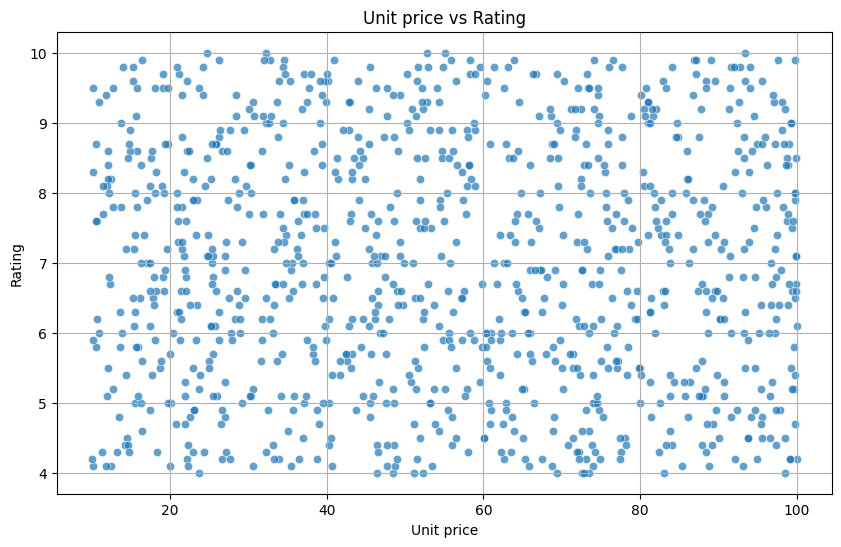

In [21]:
import matplotlib.pyplot as plt

# Gráfico de dispersão de 'Unit price' vs 'Rating'
plt.figure(figsize=(10, 6))
plt.scatter(dataf['Unit price'], dataf['Rating'], alpha=0.7, edgecolors='w', linewidth=0.5)
plt.title('Unit price vs Rating')
plt.xlabel('Unit price')
plt.ylabel('Rating')
plt.grid(True)
plt.show()

In [22]:
#analisando o gráfico, podemos analisar que as avaliações não tem relação com o preço.

**Verificando perfil de cliente que mais compra levando em conta as colunas 'Customer type', 'Gender', 'City'**

In [23]:
#criando um df separando as 3 colunas
buyer_profile = dataf.groupby(['Customer type', 'Gender', 'City']).size().reset_index(name = 'count')

# Vendo qual a combinação que mais se repete
buyer_profile = buyer_profile.loc[buyer_profile['count'].idxmax()]

buyer_profile

,1
Customer type,Member
Gender,Female
City,Naypyitaw
count,96


In [24]:
#verificando o que foi retornado, é possível analisar que o perfil que mais compra é da cidade de Naypyitaw, é do genero feminino e é membro

**Quais são os meses de pico de vendas? E os meses mais fracos? Gere um gráfico de sua escolha para exemplificar essas diferenças**

In [25]:
dataf['Month'] = dataf['Date'].dt.month

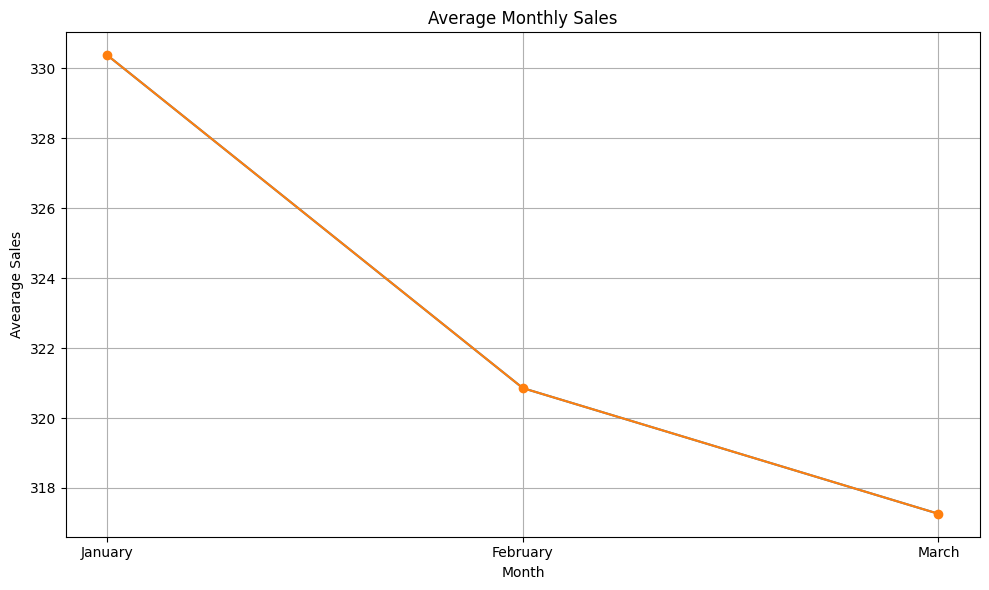

In [26]:
#agrupando coluna total e meses
import matplotlib.pyplot as plt
import calendar

sales_peak = dataf.groupby('Month')['Total'].mean()
sales_peak.plot(kind = 'line')

# Plotando o gráfico de linhas
ax = sales_peak.plot(kind='line', marker='o', figsize=(10, 6))

# Ajustando os ticks do eixo x para exibir o nome dos meses
ax.set_xticks(sales_peak.index)
ax.set_xticklabels([calendar.month_name[i] for i in sales_peak.index])

plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Avearage Sales')
plt.grid(True)
plt.tight_layout()

plt.show()

In [27]:
#observando o gráfico, foi possível analisar que as vendas decaíram nos meses de fevereiro e março

**Qual filial gera mais receita?**

In [28]:
city = dataf.groupby('City')['Total'].sum().sort_values(ascending = False)


In [29]:
city

,Total
City,
Naypyitaw,110568.7065
Yangon,106200.3705
Mandalay,106197.6720


In [30]:
#analisando os valores retornados, foi possível obervar que a filial de Naypyitaw	é a que mais vende



>Há uma diferença no padrão de vendas durante os dias da semana e os fins de semana?



In [31]:
dataf['day_type'] = dataf['Date'].apply(lambda x: 'weekend' if x.weekday() >= 5 else 'weekday')

# Agrupando por 'day_type' e somando o número de vendas
sales = dataf.groupby('day_type')['Total'].sum().reset_index()

sales

,day_type,Total
0,weekday,222388.047
1,weekend,100578.702


In [32]:
#com os valores retornados, pode-se dizer que durante dias de semana, os clientes fazem mais compras

**INSIGHTS**


1.  **Melhorar Qualidade da linha de produtos Home and lifestyle**

  Durante as análises, foi possível observar que esse gênero de produto,
conta com a pior avaliação dentro as linhas vendidas. Apesar de ser uma
diferença pequena, o proprietário deveria ter uma atenção maior na
qualidade dos produtos.

2.   **Mais vendas nos finais de semana**

  Após observar o faturamento e as datas, foi identificado que nos
finais de semana as compras caem muito, portanto deve ser implementada
alguma estratégia como promoções para atrair clientes aos finais de
semana.

3.   **Investimento maior durante os meses de fevereiro e março**

  De acordo com os dados apresentados, o numero de vendas teve uma queda
significativa conforme o tempo foi passando, portanto, deve-se ter um
investimento maior em marketing ou outras maneiras de atrair clientes
para que o desempenho de janeiro seja igualado ou melhorado.



